# Task 5: Performing Exploratory Data Analysis 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [12]:
data=pd.read_csv('SampleSuperStore.csv')

In [55]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [56]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [57]:
data.Country.unique(), data.Segment.unique(),data['Ship Mode'].unique(),data.Segment.unique()

(array(['United States'], dtype=object),
 array(['Consumer', 'Corporate', 'Home Office'], dtype=object),
 array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
       dtype=object),
 array(['Consumer', 'Corporate', 'Home Office'], dtype=object))

## Note: Here, removing the "Country" column should not affect because it countains only one value of United States

In [58]:
data.drop(['Country'], axis=1,inplace=True)

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

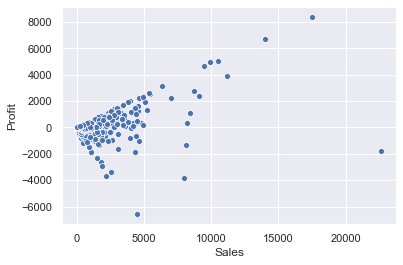

In [59]:
sns.scatterplot(x=data.Sales, y=data.Profit)

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

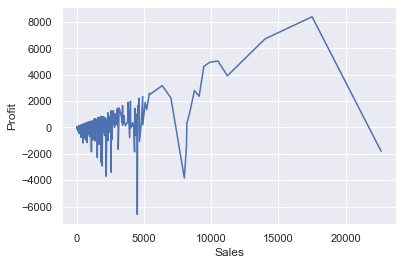

In [60]:
sns.lineplot(x=data.Sales, y=data.Profit)

<AxesSubplot:xlabel='Quantity', ylabel='Profit'>

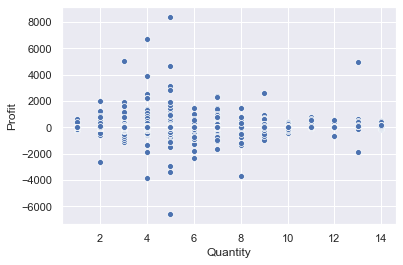

In [61]:
sns.scatterplot(x=data.Quantity,y=data.Profit)

<AxesSubplot:xlabel='Profit', ylabel='Quantity'>

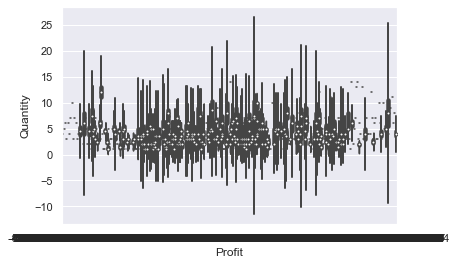

In [62]:
sns.violinplot(y=data.Quantity ,x=data.Profit)

<AxesSubplot:>

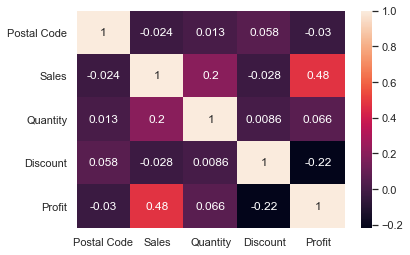

In [63]:
correlation=data.corr()
sns.heatmap(correlation, annot=True)

In [104]:
data

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


<AxesSubplot:xlabel='Sales'>

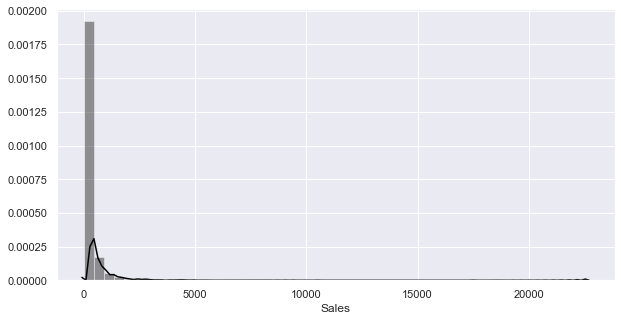

In [124]:
plt.figure(figsize=(10,5))
sns.distplot(df.Sales, color='black')

<AxesSubplot:xlabel='Profit'>

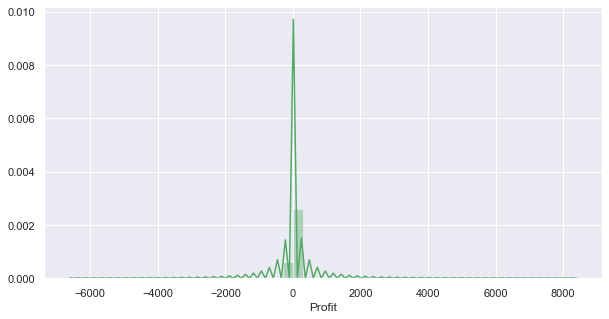

In [121]:
plt.figure(figsize=(10,5))
sns.distplot(df.Profit, color='g')

<AxesSubplot:xlabel='Quantity'>

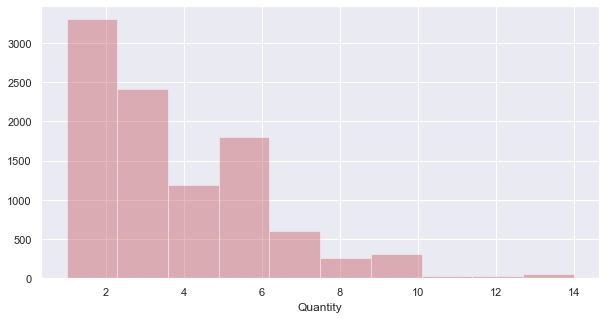

In [126]:
plt.figure(figsize=(10,5))
sns.distplot(df.Quantity, bins=10, kde=False, color='r')

<AxesSubplot:xlabel='Discount'>

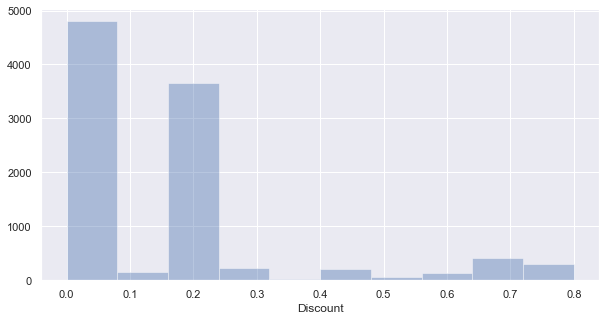

In [129]:
plt.figure(figsize=(10,5))
sns.distplot(df.Discount, bins=10, kde=False)

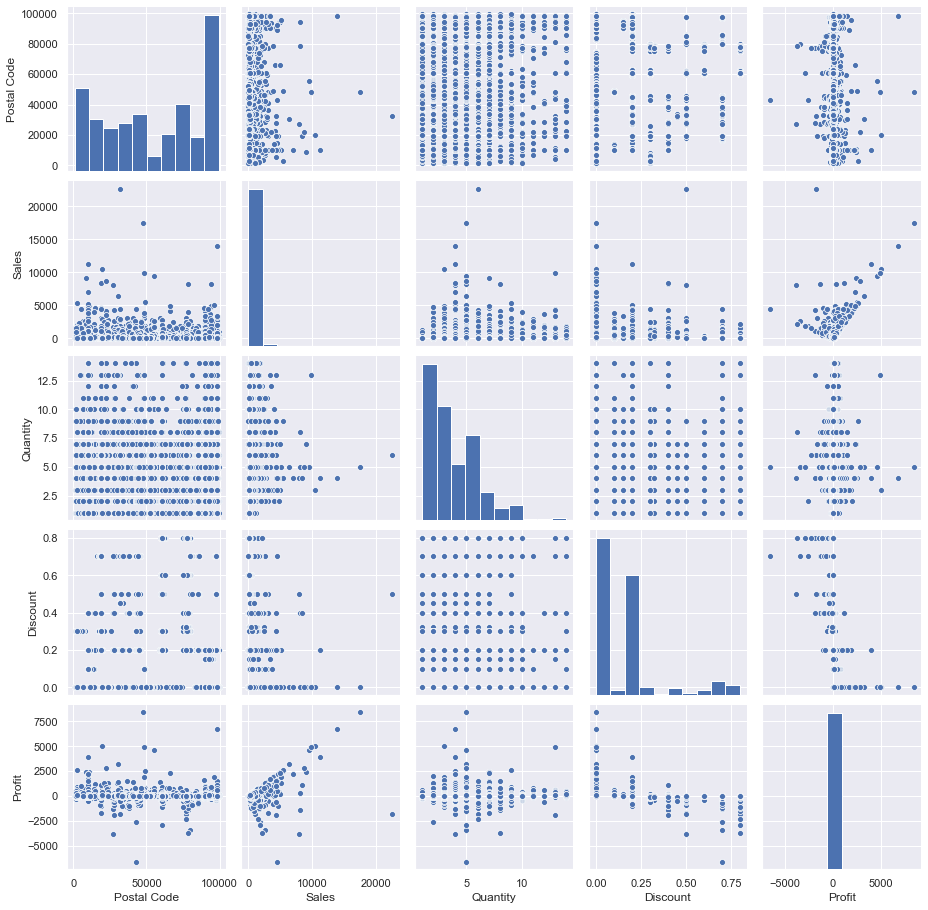

In [130]:
sns.pairplot(df)

# Note: Here the postal code is also creating a havoc so removing it will give us a clear idea about the data

In [131]:
df.drop(['Postal Code'], axis=1, inplace=True)

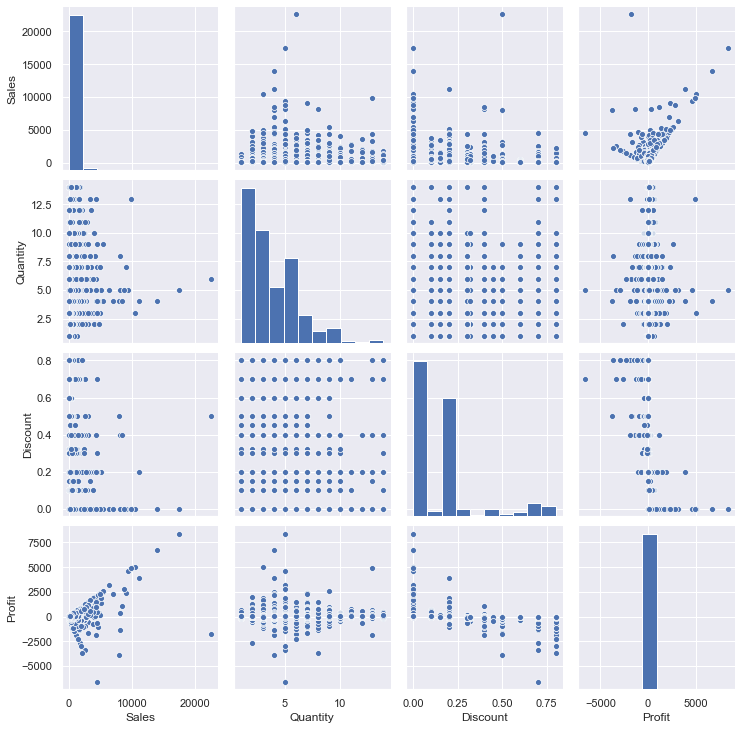

In [133]:
sns.pairplot(df)

# Let us get a clear view about the Ship Mode

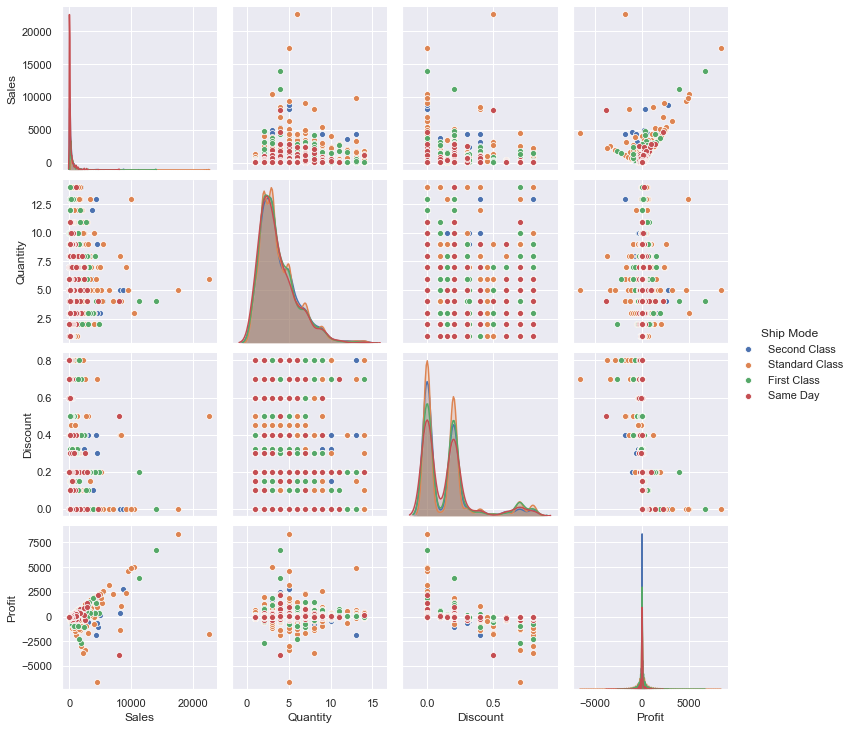

In [135]:
sns.pairplot(df, hue='Ship Mode')

# Lets see the clear view about Segments

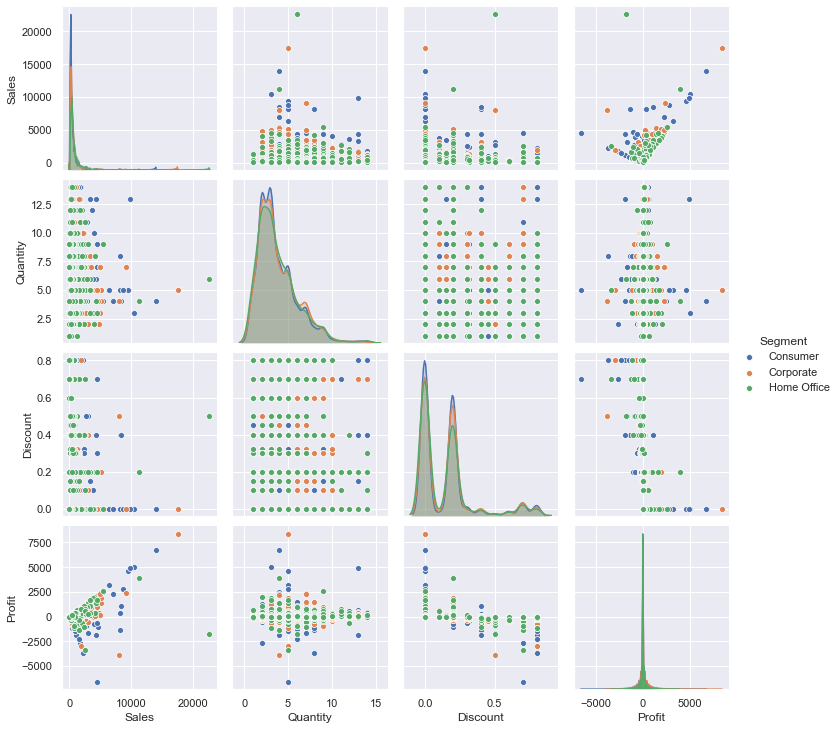

In [136]:
sns.pairplot(df, hue='Segment')

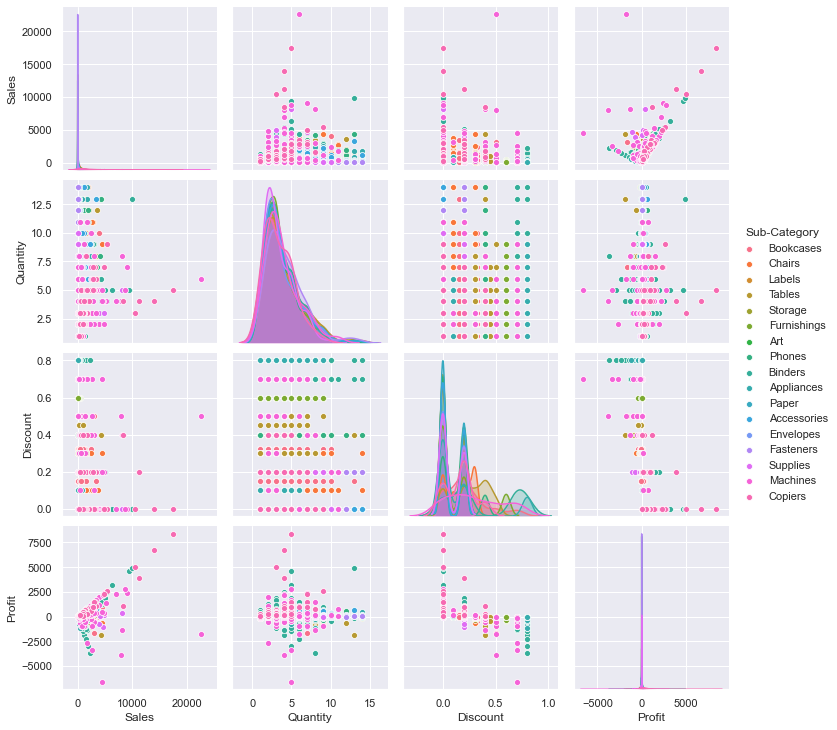

In [140]:
sns.pairplot(df, hue='Sub-Category')

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

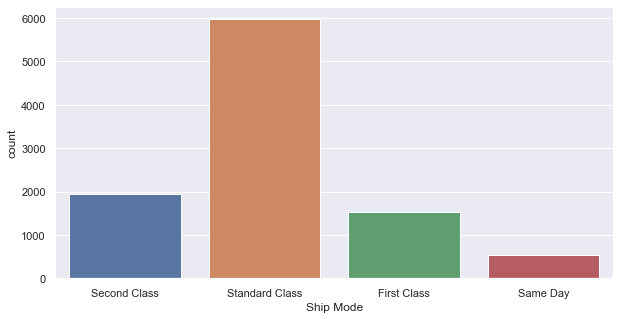

In [142]:
plt.figure(figsize=(10,5))
sns.countplot('Ship Mode', data=df)

([<matplotlib.patches.Wedge at 0x257afd37320>,
 [Text(-1.9516277527462187, -1.0154551268819043, 'Standard Class'),
  Text(2.1666304448085603, -0.3817230876285331, 'Second Class'),
  Text(1.3319631283847884, 1.7509637987758082, 'First Class'),
  Text(-0.008452653806851021, 2.1999837619045333, 'Same Day')],
 [Text(-1.0645242287706647, -0.5538846146628569, '60%'),
  Text(1.181798424441033, -0.20821259325192712, '19%'),
  Text(0.726525342755339, 0.9550711629686226, '15%'),
  Text(-0.004610538440100556, 1.199991142857018, '5%')])

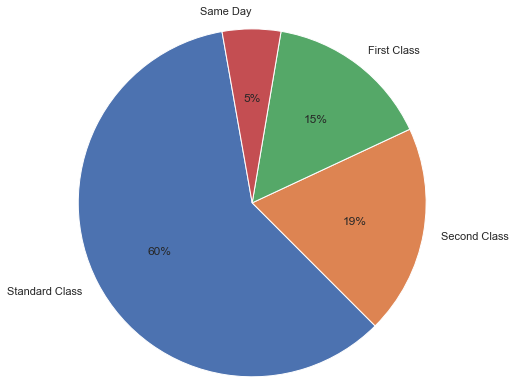

In [30]:
plt.pie(data['Ship Mode'].value_counts(), labels=data['Ship Mode'].value_counts().index, startangle=100, radius=2, autopct='%1.0f%%')

# Note :Here the standard class people are more

<AxesSubplot:xlabel='Segment', ylabel='count'>

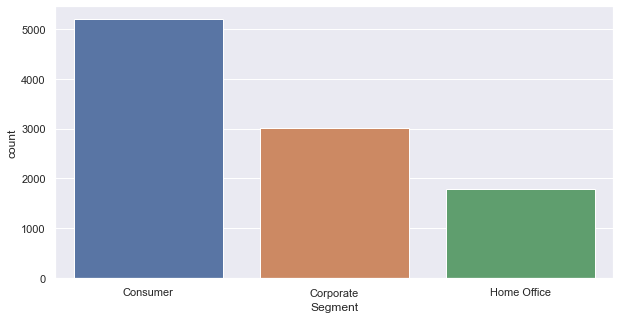

In [157]:
plt.figure(figsize=(10,5))
sns.countplot('Segment', data=df)

([<matplotlib.patches.Wedge at 0x257afce4a90>,
 [Text(-2.139266768771379, -0.5133592231863208, 'Consumer'),
  Text(2.0848554734508093, -0.7024084672198944, 'Corporate'),
  Text(0.8281657548138929, 2.038171112186986, 'Home Office')],
 [Text(-1.1668727829662067, -0.2800141217379931, '52%'),
  Text(1.1371938946095324, -0.3831318912108514, '30%'),
  Text(0.4517267753530324, 1.1117296975565378, '18%')])

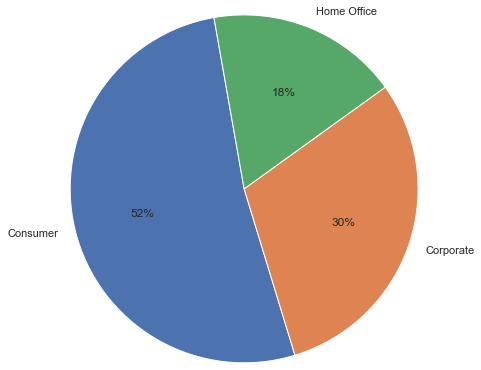

In [29]:
plt.pie(data['Segment'].value_counts(), labels=data['Segment'].value_counts().index, startangle=100, radius=2, autopct='%1.0f%%')

# Note: Here the consumer quantity is the highest

<AxesSubplot:xlabel='Sub-Category', ylabel='count'>

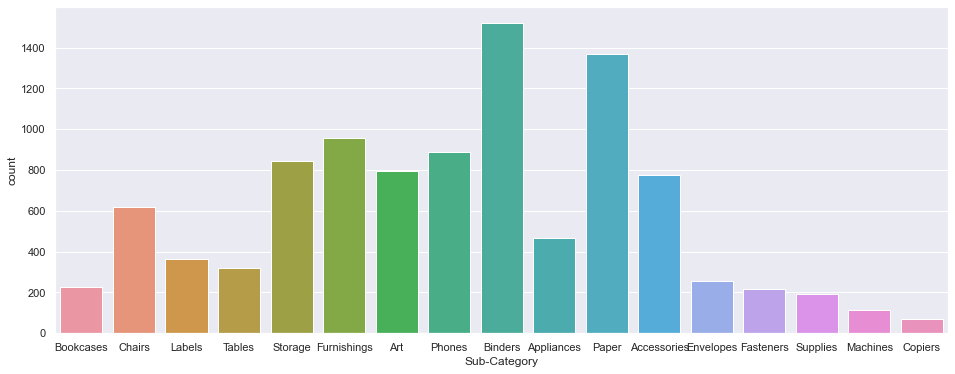

In [154]:
plt.figure(figsize=(16,6))
sns.countplot('Sub-Category', data=df)


([<matplotlib.patches.Wedge at 0x257ae846da0>,
 [Text(-1.3371557311199105, 1.747001588646438, 'Binders'),
  Text(-2.1999277723926096, 0.01782684087805177, 'Paper'),
  Text(-1.6490537135901835, -1.4562355062607233, 'Furnishings'),
  Text(-0.5807127141471231, -2.1219737848587767, 'Phones'),
  Text(0.6043188705461119, -2.115372001020594, 'Storage'),
  Text(1.5696167496247282, -1.541526275902394, 'Art'),
  Text(2.1127776715368154, -0.6133274090202341, 'Accessories'),
  Text(2.173610647976368, 0.3397304093008956, 'Chairs'),
  Text(1.9354271317489398, 1.0460027809189005, 'Appliances'),
  Text(1.6000990063286578, 1.5098619704946683, 'Labels'),
  Text(1.2416794005998442, 1.8161035945468562, 'Tables'),
  Text(0.896238424963549, 2.00916815762615, 'Envelopes'),
  Text(0.5827135698644534, 2.121425203841942, 'Bookcases'),
  Text(0.2812333670070981, 2.1819504561932317, 'Fasteners'),
  Text(0.0005379295365512333, 2.1999999342345022, 'Supplies'),
  Text(-0.21006895207883539, 2.1899477243469763, 'Machi

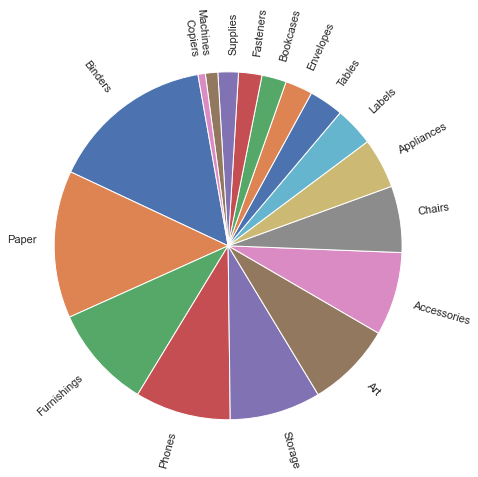

In [21]:
plt.pie(data['Sub-Category'].value_counts(), labels=data['Sub-Category'].value_counts().index,rotatelabels=True, startangle=100, radius=2)

# Note: The most product sold are from Binders Sub-category and it followed by paper and furnishings

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 [Text(0, 0, 'Kentucky'),
  Text(1, 0, 'California'),
  Text(2, 0, 'Florida'),
  Text(3, 0, 'North Carolina'),
  Text(4, 0, 'Washington'),
  Text(5, 0, 'Texas'),
  Text(6, 0, 'Wisconsin'),
  Text(7, 0, 'Utah'),
  Text(8, 0, 'Nebraska'),
  Text(9, 0, 'Pennsylvania'),
  Text(10, 0, 'Illinois'),
  Text(11, 0, 'Minnesota'),
  Text(12, 0, 'Michigan'),
  Text(13, 0, 'Delaware'),
  Text(14, 0, 'Indiana'),
  Text(15, 0, 'New York'),
  Text(16, 0, 'Arizona'),
  Text(17, 0, 'Virginia'),
  Text(18, 0, 'Tennessee'),
  Text(19, 0, 'Alabama'),
  Text(20, 0, 'South Carolina'),
  Text(21, 0, 'Oregon'),
  Text(22, 0, 'Colorado'),
  Text(23, 0, 'Iowa'),
  Text(24, 0, 'Ohio'),
  Text(25, 0, 'Missouri'),
  Text(26, 0, 'Oklahoma'),
  Text(27, 0, 'New Mexico'),
  Text(28, 0, 'Louisiana'),


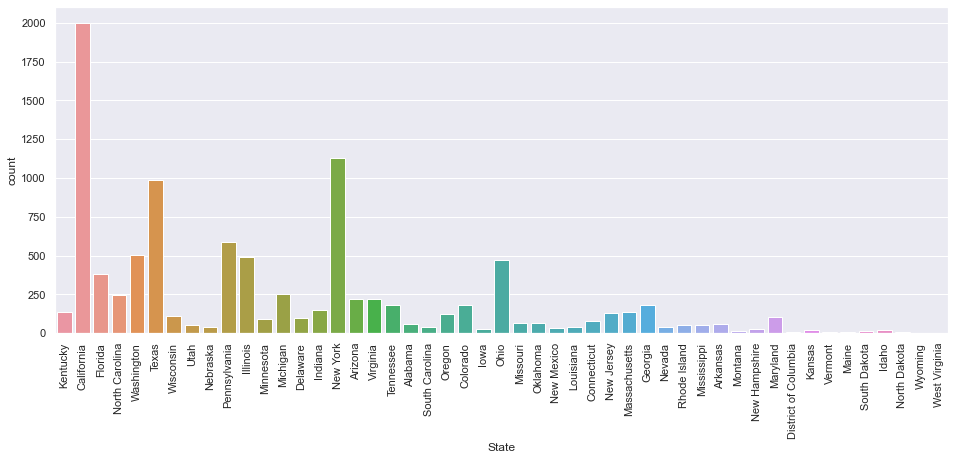

In [158]:
plt.figure(figsize=(16,6))
sns.countplot('State', data=df)
plt.xticks(rotation=90)

([<matplotlib.patches.Wedge at 0x257ae99dac8>,
 [Text(-1.5836040934450544, 1.527153585997187, 'California'),
  Text(-2.1487166096404207, -0.47224668495964756, 'New York'),
  Text(-1.4007856655610897, -1.696407828076308, 'Texas'),
  Text(-0.4286239966728221, -2.157841854602931, 'Pennsylvania'),
  Text(0.32332251803292017, -2.1761117961476275, 'Washington'),
  Text(0.979086581336747, -1.9701242260949745, 'Illinois'),
  Text(1.5208915709389936, -1.5896190831286345, 'Ohio'),
  Text(1.887337417774563, -1.1304678108942534, 'Florida'),
  Text(2.074711313765197, -0.7318285075990759, 'Michigan'),
  Text(2.164187726726438, -0.39533717695993564, 'North Carolina'),
  Text(2.19887414419789, -0.07037398651488143, 'Arizona'),
  Text(2.186983481957412, 0.23896286248167195, 'Virginia'),
  Text(2.1384572284133267, 0.5167210874802702, 'Georgia'),
  Text(2.0647626579679423, 0.7594439849397441, 'Tennessee'),
  Text(1.9642414554032608, 0.9908357607975603, 'Colorado'),
  Text(1.8507086906557189, 1.1894861673

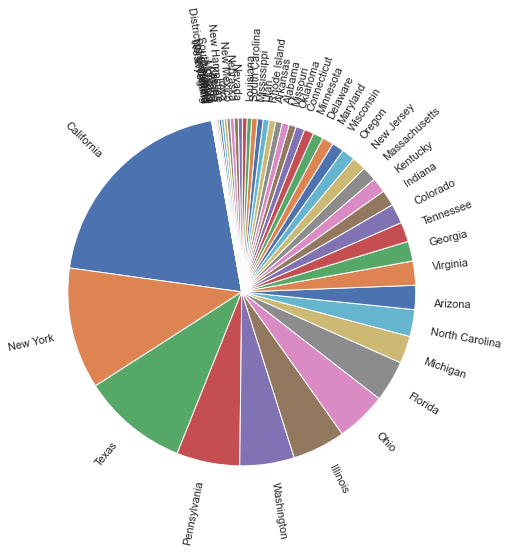

In [23]:
plt.pie(data['State'].value_counts(), labels=data['State'].value_counts().index,rotatelabels=True, startangle=100, radius=2)

# Note: Clearly most number of company buisness is in california

<AxesSubplot:xlabel='Region', ylabel='count'>

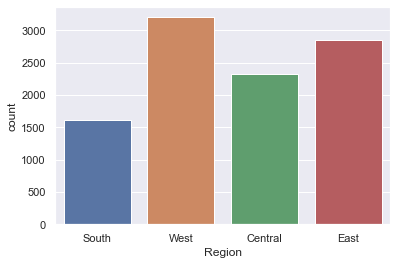

In [159]:
sns.countplot('Region', data=df)

([<matplotlib.patches.Wedge at 0x257afc3bfd0>,
 [Text(-2.035295438641851, 0.835208044407904, 'West'),
  Text(-0.1277141274419986, -2.196289849189248, 'East'),
  Text(2.1999873731585935, -0.007453720061335939, 'Central'),
  Text(0.722691127928856, 2.07791182046133, 'South')],
 [Text(-1.1101611483501004, 0.45556802422249304, '32%'),
  Text(-0.06966225133199923, -1.1979762813759534, '28%'),
  Text(1.1999931126319598, -0.004065665488001421, '23%'),
  Text(0.3941951606884669, 1.1334064475243617, '16%')])

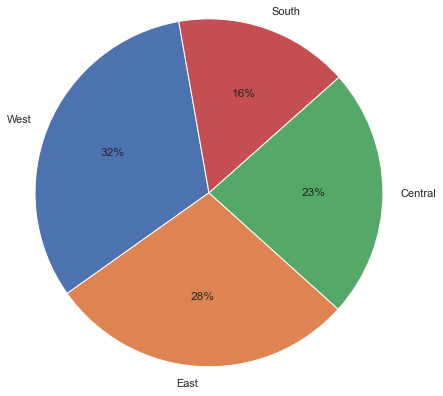

In [26]:
plt.pie(data['Region'].value_counts(), labels=data['Region'].value_counts().index, startangle=100, radius=2, autopct='%1.0f%%')

# Note: Most number of people buying products are from western region followed by the eastern region

<AxesSubplot:xlabel='Category', ylabel='count'>

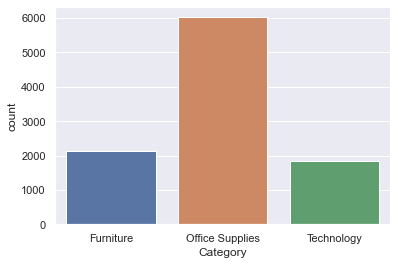

In [161]:
sns.countplot('Category', data=df)

([<matplotlib.patches.Wedge at 0x257afc9e198>,
 [Text(-1.932790511256311, -1.0508667087683237, 'Office Supplies'),
  Text(2.1924985680804174, -0.18152142839157848, 'Furniture'),
  Text(0.8689995221322703, 2.0210986691732513, 'Technology')],
 [Text(-1.0542493697761695, -0.5732000229645401, '60%'),
  Text(1.1959083098620458, -0.09901168821358824, '21%'),
  Text(0.47399973934487466, 1.1024174559126823, '18%')])

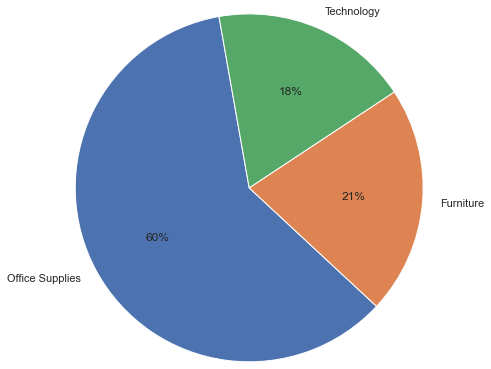

In [27]:
plt.pie(data['Category'].value_counts(), labels=data['Category'].value_counts().index, startangle=100, radius=2, autopct='%1.0f%%')

# Note: From the above graph, we can see that office supplies are large

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

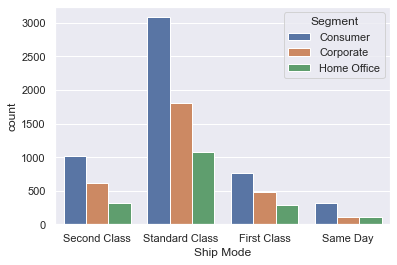

In [163]:
sns.countplot("Ship Mode",hue="Segment",data=df)

# Note: Even in the standard class, the greatest segment is Consumer followed by Corporate

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

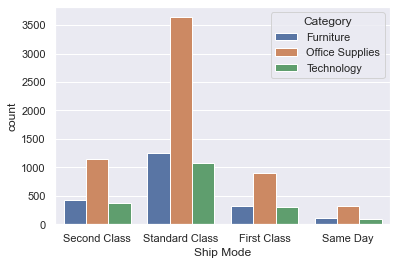

In [165]:
sns.countplot("Ship Mode",hue="Category",data=df)

# Note: The office supplies are more in Standard class people

<AxesSubplot:xlabel='Segment', ylabel='count'>

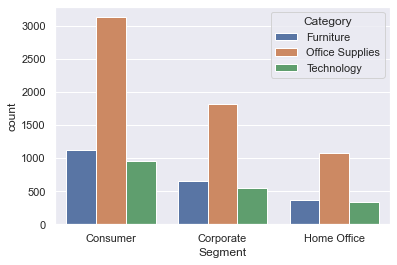

In [166]:
sns.countplot("Segment",hue="Category",data=df)

# Note: The consumer buys all the three items the most and more sales of office supplies though

<AxesSubplot:xlabel='Profit', ylabel='Ship Mode'>

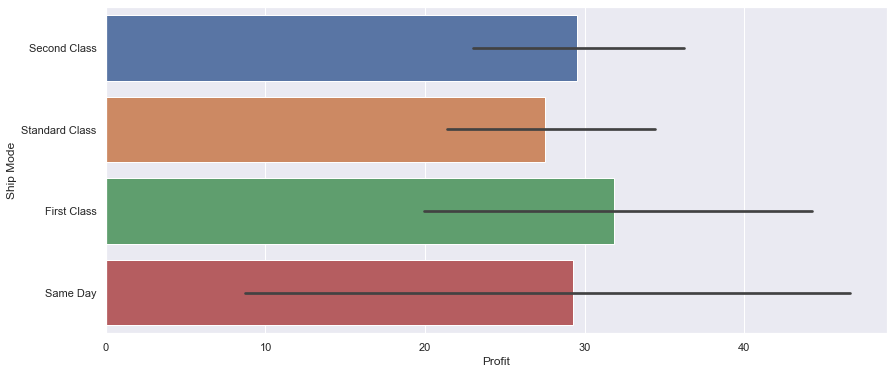

In [168]:
plt.figure(figsize=(14,6))
sns.barplot(x="Profit",y="Ship Mode",data=df)

# Note: The profit is more in Same day

<AxesSubplot:xlabel='Profit', ylabel='Segment'>

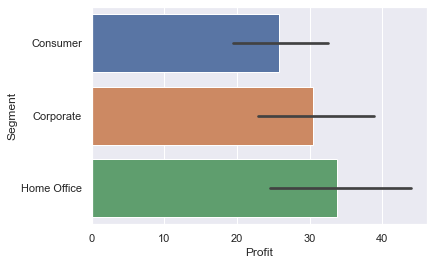

In [169]:
sns.barplot(x="Profit",y="Segment",data=df)

# Note: Most profitable segment is Home Office

<AxesSubplot:xlabel='Profit', ylabel='Category'>

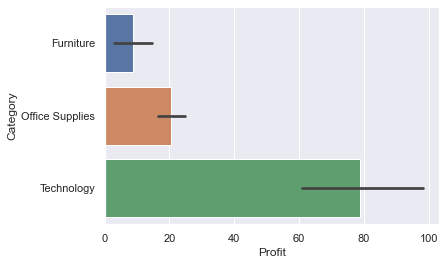

In [170]:
sns.barplot(x="Profit",y="Category",data=df)

# Note: Most profitable category is Technology

<AxesSubplot:xlabel='Profit', ylabel='Sub-Category'>

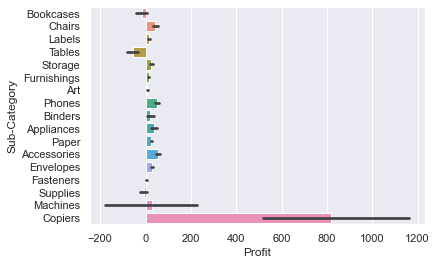

In [171]:
sns.barplot(x="Profit",y="Sub-Category",data=df)

# Note: The most profitable Sub-Category is Copiers and mostof the profit is made from it

<AxesSubplot:xlabel='Sales', ylabel='Segment'>

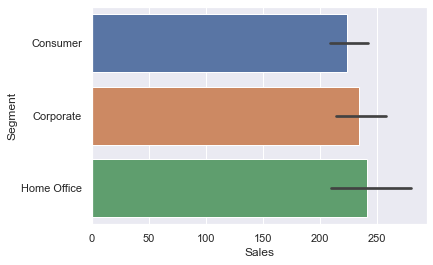

In [174]:
sns.barplot(x="Sales",y="Segment",data=df)

# Note: Most sales are done in Home Office segment

<AxesSubplot:xlabel='Sales', ylabel='Category'>

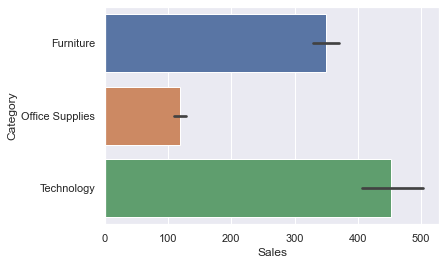

In [176]:
sns.barplot(x="Sales",y="Category",data=df)

# Note: Most Sales are done in Technology category 

<AxesSubplot:xlabel='Quantity', ylabel='Segment'>

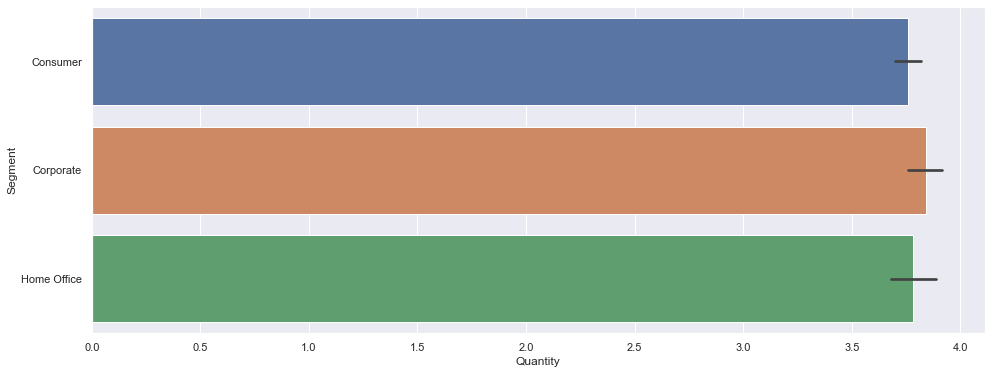

In [178]:
plt.figure(figsize=(16,6))
sns.barplot(x="Quantity",y="Segment",data=df)

# Note: More number of products are sent to corporate segment

<AxesSubplot:xlabel='Quantity', ylabel='Category'>

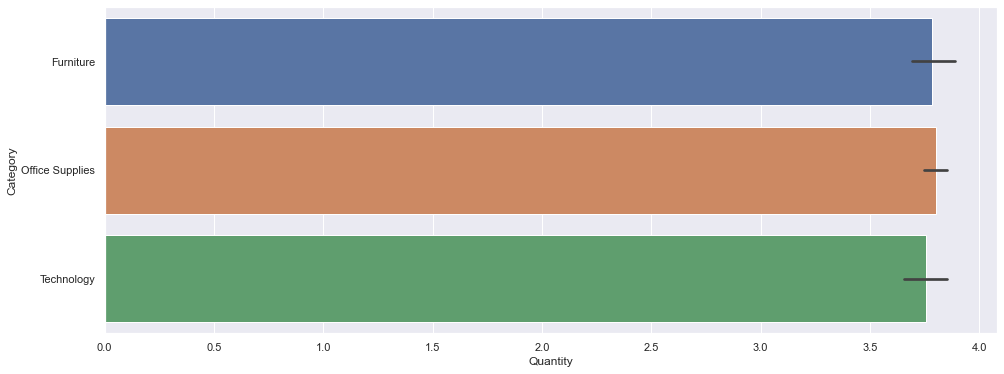

In [181]:
plt.figure(figsize=(16,6))
sns.barplot(x="Quantity",y="Category",data=df)

# Note: More quantity of goods arein furniture category

<AxesSubplot:xlabel='Quantity', ylabel='Region'>

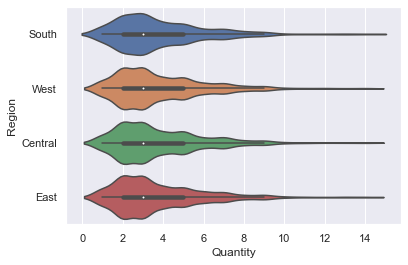

In [185]:
sns.violinplot(x="Quantity",y="Region",data=df)

<AxesSubplot:xlabel='Quantity', ylabel='Segment'>

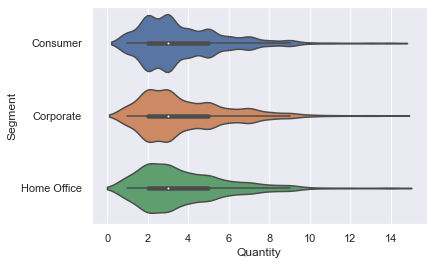

In [186]:
sns.violinplot(x="Quantity",y="Segment",data=df)

<AxesSubplot:xlabel='Quantity', ylabel='Category'>

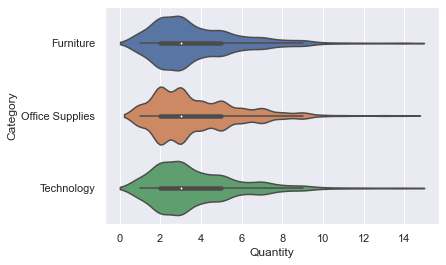

In [187]:
sns.violinplot(x="Quantity",y="Category",data=df)

### Note: From the above four plot, we can easily get to know more about the outliers and even see which areas are the densest so to clearly remove the outliers while making of the model predictions accurate.